In [99]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [100]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Итак, набор данных содержит следующие столбцы:

* age — возраст основного бенефициара;
* sex — пол страхового подрядчика;
* bmi — индекс массы тела (кг/м2), в идеале — от 18.5 до 24.9;
* children — количество детей, охваченных медицинской страховкой;
* smoker — является ли человек курящим;
* region — жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);
* charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

Размер таблицы:

In [101]:
print(data.shape)
# (1338, 7)

(1338, 7)


Выведем информацию о пропусках, так как наличие пропусков не позволит нам построить модель линейной регрессии:

In [102]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропуски в таблице отсутствуют.

Посмотрим на типы данных:

In [103]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Наши данные содержат несколько типов признаков:

* age, bmi, children — числовые признаки;
* sex, smoker — бинарные категориальные переменные (две категории);
* region — множественные категориальные переменные (несколько категорий);
* charges — числовой целевой признак.

Мы знаем, что модель линейной регрессии не умеет работать с категориальными признаками, поэтому категории необходимо перекодировать.

Кодировку будем совершать по следующему принципу:

* smoker — переведём в бинарные значения (0 — некурящий, 1 — курящий);
* sex — аналогично (0 — female, 1 — male);
* region — используем OneHot-кодирование (воспользуемся функцией get_dummies).

In [104]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Итак, мы получили перекодированную таблицу, в которой все признаки являются числовыми.

Выделим факторы и целевой признак в отдельные таблицы:

In [105]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

# 6.1
Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.

Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.

В качестве значения параметра random_state укажите число 42.

Чему равно количество наблюдений в тестовом наборе данных?

In [106]:
#Разделяем выборку на тренировочную и тестовую в соотношении 70/30
#Устанавливаем random_state для воспроизводимости результатов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)
 
# Train: (354, 13) (354,)
# Test: (152, 13) (152,)

Train: (1070, 9) (1070,)
Test: (268, 9) (268,)


# 6.2

Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.

Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

In [107]:
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X_train, y_train)

print('w0 = {}'.format(lr_full.intercept_)) #свободный член w0
print('w1 = {}'.format(lr_full.coef_)) #остальные параметры модели w1, w2, ..., wm
 
# w0: 34.55384087938311
# w1: [-0.95004935]

w0 = -12390.804294570278
w1 = [ 2.56975706e+02 -1.85916916e+01  3.37092552e+02  4.25278784e+02
  2.36511289e+04  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02]


# 6.3
С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. Рассчитайте следующие три метрики: R2, MAE, MAPE. Не забудьте привести значение MAPE к процентам.

Значение R2 округлите до трёх знаков после точки-разделителя, а значения MAE и MAPE — до целого числа.

Чему равны значения метрик на тренировочной и тестовой выборках?

In [108]:
#Делаем предсказание по тренировочной выборке
y_predict_train = lr_full.predict(X_train)
#Рассчитываем MAE
print('MAE score: {:.0f} thou. $'.format(metrics.mean_absolute_error(y_train, y_predict_train)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_train, y_predict_train))))
#Рассчитываем MAPE
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_train, y_predict_train) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_train, y_predict_train)))

MAE score: 4208 thou. $
RMSE score: 6105.545 thou. $
MAPE score: 42 %
R2 score: 0.742


In [109]:
#Делаем предсказание по тестовой выборке
y_predict_test = lr_full.predict(X_test)
#Рассчитываем MAE
print('MAE score: {:.0f} thou. $'.format(metrics.mean_absolute_error(y_test, y_predict_test)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict_test))))
#Рассчитываем MAPE
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_predict_test) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_predict_test)))

MAE score: 4181 thou. $
RMSE score: 5796.285 thou. $
MAPE score: 47 %
R2 score: 0.784


# 6.4
Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. В качестве ошибки возьмите разницу между истинным ответом и предсказанием: y-y* (без модуля).

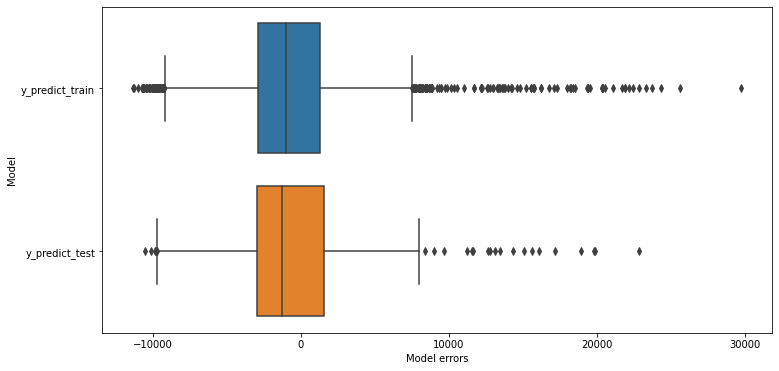

In [110]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на всех факторах
y_errors_train = y_train - y_predict_train
#Ошибки модели на всех факторах
y_errors_test = y_test - y_predict_test
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'y_predict_train': y_errors_train, 
     'y_predict_test': y_errors_test
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

# 6.5
Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). Расчёт параметров нормализации (fit) произведите на тренировочной выборке.

Примечание. Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.

На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

In [111]:
#Инициализируем стандартизатор StandardScaler
mm_scaler = preprocessing.MinMaxScaler()
#Производим стандартизацию
X_scaled_train = mm_scaler.fit_transform(X_train)
X_scaled_test = mm_scaler.fit_transform(X_test)
#Составляем DataFrame из результата
X_scaled_train = pd.DataFrame(X_scaled_train, columns=features)
X_scaled_test = pd.DataFrame(X_scaled_test, columns=features)
X_scaled_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.0,0.107345,0.4,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.0,0.224913,0.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.0,0.239440,0.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.0,0.493947,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.0,0.148238,0.6,0.0,0.0,1.0,0.0,0.0


In [112]:
X_scaled_test.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.586957,0.0,0.233748,0.4,0.0,1.0,0.0,0.0,0.0
1,0.391304,0.0,0.369216,0.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.0,0.281560,0.0,1.0,0.0,1.0,0.0,0.0
3,0.608696,1.0,0.249685,0.6,0.0,0.0,1.0,0.0,0.0
4,0.021739,1.0,0.422340,0.0,1.0,0.0,1.0,0.0,0.0


In [113]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_scaled_train)
poly.fit(X_scaled_test)
#Генерируем полиномиальные признаки для тренировочной выборки
X_scaled_train_poly = poly.transform(X_scaled_train)
X_scaled_test_poly = poly.transform(X_scaled_test)
#Выводим результирующие размерности таблиц
print(X_scaled_train_poly.shape)
print(X_scaled_test_poly.shape)

(1070, 54)
(268, 54)


# 6.6
Обучите модель линейной регрессии на полиномиальных признаках.

Чему равно значение метрики R2 на тестовой выборке?

Значение R2 округлите до трёх знаков после запятой.

In [114]:
#Создаём объект класса LinearRegression
poly_model = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
poly_model.fit(X_scaled_train_poly, y_train)

LinearRegression()

In [115]:
y_predict_test_poly = poly_model.predict(X_scaled_test_poly)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_predict_test_poly)))

R2 score: 0.866


# 6.7
Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.

Какой вывод можно сделать?

In [116]:
print('w0 = {}'.format(lr_full.intercept_)) #свободный член w0
print('w1 = {}'.format(lr_full.coef_)) #остальные параметры модели w1, w2, ..., wm

w0 = -12390.804294570278
w1 = [ 2.56975706e+02 -1.85916916e+01  3.37092552e+02  4.25278784e+02
  2.36511289e+04  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02]


Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация.

# 6.8
Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.

Чему равны метрики R2, MAE и MAPE на тестовой выборке?

Значение R2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

In [117]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель
lasso_lr_poly.fit(X_scaled_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_scaled_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_scaled_test_poly)


In [118]:
#Рассчитываем MAE
print('MAE score: {:.0f} thou. $'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict_poly))))
#Рассчитываем MAPE
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))

MAE score: 2684 thou. $
RMSE score: 4552.366 thou. $
MAPE score: 30 %
R2 score: 0.867


In [119]:
print('w0 = {}'.format(lasso_lr_poly.intercept_)) #свободный член w0
print('w1 = {}'.format(lasso_lr_poly.coef_)) #остальные параметры модели w1, w2, ..., wm

w0 = 2249.713524103523
w1 = [ 3.24221653e+03 -4.92313816e+02  5.07612317e+03  4.58362056e+03
  1.97928569e+03  1.88025707e+02 -4.70775218e+02  5.83657101e+02
 -2.43543456e+02  8.29826751e+03  7.74581954e+02  8.44448593e+02
 -1.20775688e+03  1.34809915e+02 -1.04309726e+03 -0.00000000e+00
  1.16964229e+03  1.61765564e+03 -0.00000000e+00  5.05847740e+02
 -1.13425152e+03  2.65796922e+02 -1.22240479e+03  0.00000000e+00
  2.36213242e+02 -5.80031340e+02 -8.17963257e+03  1.29487768e+03
  5.47148553e+04  3.58531873e+03  2.40690210e+03 -9.63549427e+02
  0.00000000e+00 -1.67464337e+03 -2.05436459e+03  1.94204864e+03
  1.95394442e+03 -0.00000000e+00 -1.06364416e+03  8.00606774e+00
  5.93688978e+02 -0.00000000e+00 -2.30643423e+02  1.97933477e+03
  6.31615519e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.05849873e-01]


# 6.9
Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.

Чему равны метрики R2, MAE и MAPE на тестовой выборке?

Значение R2 округлите до трёх знаков после запятой, а значения MAE и MAPE до целого числа.

In [120]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель
ridge_lr_poly.fit(X_scaled_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_scaled_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_scaled_test_poly)

In [121]:
#Рассчитываем MAE
print('MAE score: {:.0f} thou. $'.format(metrics.mean_absolute_error(y_test, y_test_predict_poly)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict_poly))))
#Рассчитываем MAPE
print('MAPE score: {:.0f} %'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict_poly) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))

MAE score: 2818 thou. $
RMSE score: 4593.892 thou. $
MAPE score: 31 %
R2 score: 0.864


In [122]:
print('w0 = {}'.format(lasso_lr_poly.intercept_)) #свободный член w0
print('w1 = {}'.format(lasso_lr_poly.coef_)) #остальные параметры модели w1, w2, ..., wm

w0 = 2249.713524103523
w1 = [ 3.24221653e+03 -4.92313816e+02  5.07612317e+03  4.58362056e+03
  1.97928569e+03  1.88025707e+02 -4.70775218e+02  5.83657101e+02
 -2.43543456e+02  8.29826751e+03  7.74581954e+02  8.44448593e+02
 -1.20775688e+03  1.34809915e+02 -1.04309726e+03 -0.00000000e+00
  1.16964229e+03  1.61765564e+03 -0.00000000e+00  5.05847740e+02
 -1.13425152e+03  2.65796922e+02 -1.22240479e+03  0.00000000e+00
  2.36213242e+02 -5.80031340e+02 -8.17963257e+03  1.29487768e+03
  5.47148553e+04  3.58531873e+03  2.40690210e+03 -9.63549427e+02
  0.00000000e+00 -1.67464337e+03 -2.05436459e+03  1.94204864e+03
  1.95394442e+03 -0.00000000e+00 -1.06364416e+03  8.00606774e+00
  5.93688978e+02 -0.00000000e+00 -2.30643423e+02  1.97933477e+03
  6.31615519e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.05849873e-01]
